# Common NGS data formats and tools

## Objectives

You should be familiar with the following common examples that we use daily:

* Sequence retrieval
* Read alignment
* SAM/BAM query: index, sort, stats, visualization, filter, subset
* SAM format, SAM flags
* BED: sort, intersect (remove), merge

## Data formats

* fasta
* fastq
* bam / bam.bai / sam
* bed / bed4 / bed6 / bed6+4 == narrowPeak / bed12
* wiggle / bedgraph / bigwiggle
* vcf
* gtf / gff / gff3
* tsv / csv
* .py / .R / .sh / .jar / .pl
* Please refer to [the UCSC format FAQ](https://genome.ucsc.edu/FAQ/FAQformat.html) for "official" definition

## Tools

- fastqc / fastp
- seqtk
- BWA / bowtie2 / STAR
- samtools 
- bedtools
- deeptools
- scripting languange: Python




## FASTA format

An example shown below.

```
;LCBO - Prolactin precursor - Bovine
; a sample sequence in FASTA format
; MDSKGSSQKGSRLLLLLVVSNLLLCQGVVSTPVCPNGPGNCQVSLRDLFDRAVMVSHYIHDLSS
EMFNEFDKRYAQGKGFITMALNSCHTSSLPTPEDKEQAQQTHHEVLMSLILGLLRSWNDPLYHL
VTEVRGMKGAPDAILSRAIEIEEENKRLLEGMEMIFGQVIPGAKETEPYPVWSGLPSLQTKDED
ARYSAFYNLLHCLRRDSSKIDTYLKLLNCRIIYNNNC*

>MCHU - Calmodulin - Human, rabbit, bovine, rat, and chicken
MADQLTEEQIAEFKEAFSLFDKDGDGTITTKELGTVMRSLGQNPTEAELQDMINEVDADGNGTID
FPEFLTMMARKMKDTDSEEEIREAFRVFDKDGNGYISAAELRHVMTNLGEKLTDEEVDEMIREA
DIDGDGQVNYEEFVQMMTAK*

>gi|5524211|gb|AAD44166.1| cytochrome b [Elephas maximus maximus]
LCLYTHIGRNIYYGSYLYSETWNTGIMLLLITMATAFMGYVLPWGQMSFWGATVITNLFSAIPYIGTNLV
EWIWGGFSVDKATLNRFFAFHFILPFTMVALAGVHLTFLHETGSNNPLGLTSDSDKIPFHPYYTIKDFLG
LLILILLLLLLALLSPDMLGDPDNHMPADPLNTPLHIKPEWYFLFAYAILRSVPNKLGGVLALFLSIVIL
GLMPFLHTSKHRSMMLRPLSQALFWTLTMDLLTLTWIGSQPVEYPYTIIGQMASILYFSIILAFLPIAGX
IENY
```

### Syntax

- ";" is for comments
- ">" is for the name of a DNA/RNA/protein sequence
- The sequence name can only be written in one line, no matter how long it is
- The next line following ">" should not be an empty line

```
; invalid FASTA format
>Sequence_1

ACTTGG

; invalid FASTA format
>Sequence_2
>split line for names new sequence in human
ACGTGG
```

### Other notes

#### IUPAC code for DNA letters:


| IUPAC nucleotide code | Base                |   |   |   |
|-----------------------|---------------------|---|---|---|
| A                     | Adenine             |   |   |   |
| C                     | Cytosine            |   |   |   |
| G                     | Guanine             |   |   |   |
| T (or U)              | Thymine (or Uracil) |   |   |   |
| R                     | A or G              |   |   |   |
| Y                     | C or T              |   |   |   |
| S                     | G or C              |   |   |   |
| W                     | A or T              |   |   |   |
| K                     | G or T              |   |   |   |
| M                     | A or C              |   |   |   |
| B                     | C or G or T         |   |   |   |
| D                     | A or G or T         |   |   |   |
| H                     | A or C or T         |   |   |   |
| V                     | A or C or G         |   |   |   |
| N                     | any base            |   |   |   |
| . or -                | gap                 |   |   |   |

#### Filename extension

| Extension    | Meaning                          | Notes                                                                                                   |
|--------------|----------------------------------|---------------------------------------------------------------------------------------------------------|
| fasta, fa | generic FASTA                    | Any generic fasta file. See below for other common FASTA file extensions                                |
| fna          | FASTA nucleic acid               | Used generically to specify nucleic acids.                                                              |
| ffn          | FASTA nucleotide of gene regions | Contains coding regions for a genome.                                                                   |
| faa          | FASTA amino acid                 | Contains amino acid sequences. A multiple protein fasta file can have the more specific extension mpfa. |
| frn          | FASTA non-coding RNA             | Contains non-coding RNA regions for a genome, in DNA alphabet e.g. tRNA, rRNA                           |

### Reference

See [this](https://en.wikipedia.org/wiki/FASTA_format) wiki.

## FASTA examples

### 1. Download human genome sequence from UCSC

```shell
wget https://hgdownload.soe.ucsc.edu/goldenPath/hg38/bigZips/hg38.fa.gz

ls

gunzip hg38.fa.gz

head hg38.fa
```


```
# How many chromosomes do we have?
grep ">" hg38.fa | wc -l
```

### 2. Sequence Retrieval using online tools

This is a common task. For example: given several genes, we want to extract gene promoters, or gene exons. 

The question is simple, however, for many people who have never done it before, what we really need is a list of `genomic coordinates`.




#### Solution 1: Using ProteinPaint (https://proteinpaint.stjude.org/)

Fastest way for a single given genomic coordinate: e.g. `chr11:5248160-5248251` or `chr11	5248160	5248251`

To get the reverse completement, just use some online tool, such as: https://www.bioinformatics.org/sms/rev_comp.html


#### Solution 2: Using Ensembl BioMart (https://www.ensembl.org/biomart/martview/)

Google `ensembl biomart`, click on the first hit.

Convenient way for getting promoter/UTR/exon/intron sequences given a list of gene names/IDs.

**Exercise: get the promoter sequences for these genes**

```
Hbg1
Hbg2
hbb
hba1
```


### 3: Sequence Retrieval using [bedtools](https://bedtools.readthedocs.io/en/latest/)

The ultimate solution.



In [6]:
!bedtools getfasta


Tool:    bedtools getfasta (aka fastaFromBed)
Version: v2.30.0
Summary: Extract DNA sequences from a fasta file based on feature coordinates.

Usage:   bedtools getfasta [OPTIONS] -fi <fasta> -bed <bed/gff/vcf>

Options: 
	-fi		Input FASTA file
	-fo		Output file (opt., default is STDOUT
	-bed		BED/GFF/VCF file of ranges to extract from -fi
	-name		Use the name field and coordinates for the FASTA header
	-name+		(deprecated) Use the name field and coordinates for the FASTA header
	-nameOnly	Use the name field for the FASTA header
	-split		Given BED12 fmt., extract and concatenate the sequences
			from the BED "blocks" (e.g., exons)
	-tab		Write output in TAB delimited format.
	-bedOut		Report extract sequences in a tab-delimited BED format instead of in FASTA format.
			- Default is FASTA format.
	-s		Force strandedness. If the feature occupies the antisense,
			strand, the sequence will be reverse complemented.
			- By default, strand information is ignored.
	-fullHeader	Use full fast

## BED format

We are going to use a bed6 or a standard bed format, which contains 6 columns: chr, start, end, name, value, strand.

In [8]:
!head CTCF.hg38.random.bed

chr6	92372038	92372057	JASPA_MA0139.1_CTCF_chr6_92372039	9.80328	-
chr1	113890670	113890689	JASPA_MA0139.1_CTCF_chr1_113890671	8.7541	-
chr16	12677107	12677126	JASPA_MA0139.1_CTCF_chr16_12677108	13.9836	-
chr11	116687055	116687074	JASPA_MA0139.1_CTCF_chr11_116687056	9.04918	-
chr13	32306850	32306869	JASPA_MA0139.1_CTCF_chr13_32306851	8.11475	+
chr4	55038826	55038845	JASPA_MA0139.1_CTCF_chr4_55038827	8.18033	+
chr4	116198084	116198103	JASPA_MA0139.1_CTCF_chr4_116198085	12.0328	-
chr12	24244394	24244413	JASPA_MA0139.1_CTCF_chr12_24244395	8.44262	-
chr8	47186476	47186495	JASPA_MA0139.1_CTCF_chr8_47186477	8.85246	+
chr4	82671394	82671413	JASPA_MA0139.1_CTCF_chr4_82671395	9.55738	-


#### Other bed formats, [ref](https://bedtools.readthedocs.io/en/latest/content/general-usage.html)
    
BED3: A BED file where each feature is described by chrom, start, and end.

For example: `chr1          11873   14409`

BED4: A BED file where each feature is described by chrom, start, end, and name.

For example: `chr1  11873  14409  uc001aaa.3`

BED5: A BED file where each feature is described by chrom, start, end, name, and score.

For example: `chr1 11873 14409 uc001aaa.3 0`

BED6: A BED file where each feature is described by chrom, start, end, name, score, and strand.

For example: `chr1 11873 14409 uc001aaa.3 0 +`

BED12: A BED file where each feature is described by all twelve columns listed above.

For example: `chr1 11873 14409 uc001aaa.3 0 + 11873 11873 0 3 354,109,1189, 0,739,1347`

#### Standard bedtools getfasta usage

In [12]:
!bedtools getfasta -fi hg38.fa -bed CTCF.hg38.random.bed -fo CTCF.fa ; head CTCF.fa

>chr6:92372038-92372057
TAGCTCCCTCTTCTGAAGC
>chr1:113890670-113890689
TCTTGCCACCCTCTGACCA
>chr16:12677107-12677126
GACTGGCACCTGCTGGGCA
>chr11:116687055-116687074
CACCTCCACCTCTAGGTCT
>chr13:32306850-32306869
aatccaggaggtggagatt


#### strand-specific sequence

In [13]:
!bedtools getfasta -fi hg38.fa -bed CTCF.hg38.random.bed -fo CTCF.fa -s; head CTCF.fa

>chr6:92372038-92372057(-)
GCTTCAGAAGAGGGAGCTA
>chr1:113890670-113890689(-)
TGGTCAGAGGGTGGCAAGA
>chr16:12677107-12677126(-)
TGCCCAGCAGGTGCCAGTC
>chr11:116687055-116687074(-)
AGACCTAGAGGTGGAGGTG
>chr13:32306850-32306869(+)
aatccaggaggtggagatt


#### use the original name as the FASTA header

In [15]:
!bedtools getfasta -fi hg38.fa -bed CTCF.hg38.random.bed -fo CTCF.fa -s -name; head CTCF.fa

>JASPA_MA0139.1_CTCF_chr6_92372039::chr6:92372038-92372057(-)
GCTTCAGAAGAGGGAGCTA
>JASPA_MA0139.1_CTCF_chr1_113890671::chr1:113890670-113890689(-)
TGGTCAGAGGGTGGCAAGA
>JASPA_MA0139.1_CTCF_chr16_12677108::chr16:12677107-12677126(-)
TGCCCAGCAGGTGCCAGTC
>JASPA_MA0139.1_CTCF_chr11_116687056::chr11:116687055-116687074(-)
AGACCTAGAGGTGGAGGTG
>JASPA_MA0139.1_CTCF_chr13_32306851::chr13:32306850-32306869(+)
aatccaggaggtggagatt


#### In new bedtools version, -name adds the coordinates, we need to use -nameOnly to just use the original name

In [17]:
!bedtools getfasta -fi hg38.fa -bed CTCF.hg38.random.bed -fo CTCF.fa -s -nameOnly; head CTCF.fa

>JASPA_MA0139.1_CTCF_chr6_92372039(-)
GCTTCAGAAGAGGGAGCTA
>JASPA_MA0139.1_CTCF_chr1_113890671(-)
TGGTCAGAGGGTGGCAAGA
>JASPA_MA0139.1_CTCF_chr16_12677108(-)
TGCCCAGCAGGTGCCAGTC
>JASPA_MA0139.1_CTCF_chr11_116687056(-)
AGACCTAGAGGTGGAGGTG
>JASPA_MA0139.1_CTCF_chr13_32306851(+)
aatccaggaggtggagatt


#### TSV output

In [19]:
!bedtools getfasta -fi hg38.fa -bed CTCF.hg38.random.bed -fo CTCF.fa -s -nameOnly -tab; head CTCF.fa

JASPA_MA0139.1_CTCF_chr6_92372039(-)	GCTTCAGAAGAGGGAGCTA
JASPA_MA0139.1_CTCF_chr1_113890671(-)	TGGTCAGAGGGTGGCAAGA
JASPA_MA0139.1_CTCF_chr16_12677108(-)	TGCCCAGCAGGTGCCAGTC
JASPA_MA0139.1_CTCF_chr11_116687056(-)	AGACCTAGAGGTGGAGGTG
JASPA_MA0139.1_CTCF_chr13_32306851(+)	aatccaggaggtggagatt
JASPA_MA0139.1_CTCF_chr4_55038827(+)	aagtcagcaggtgccacaa
JASPA_MA0139.1_CTCF_chr4_116198085(-)	ctgccacaagaggatacaa
JASPA_MA0139.1_CTCF_chr12_24244395(-)	CAGTCAGTAGGAGGGGCTG
JASPA_MA0139.1_CTCF_chr8_47186477(+)	taatcaccagtggtcagta
JASPA_MA0139.1_CTCF_chr4_82671395(-)	tagcctgtagatgtcaatt



### 4: Sequence Retrieval using Python

The ultimate solution for more customized analyses.


#### PyRanges

In [56]:
import pyranges as pr
import pandas as pd

In [57]:
ctcf = pr.read_bed("CTCF.hg38.random.bed",as_df=False).sort() # sort will increase downstream analysis speed
ctcf.head()

,Chromosome,Start,End,Name,Score,Strand
0,chr1,11804507,11804526,JASPA_MA0139.1_CTCF_chr1_11804508,13.27870,+
1,chr1,29824616,29824635,JASPA_MA0139.1_CTCF_chr1_29824617,9.62295,+
2,chr1,23368354,23368373,JASPA_MA0139.1_CTCF_chr1_23368355,15.57380,-
3,chr1,29744978,29744997,JASPA_MA0139.1_CTCF_chr1_29744979,8.57377,-
4,chr1,113890670,113890689,JASPA_MA0139.1_CTCF_chr1_113890671,8.75410,-
5,chr1,116134359,116134378,JASPA_MA0139.1_CTCF_chr1_116134360,11.63930,-
6,chr1,153684245,153684264,JASPA_MA0139.1_CTCF_chr1_153684246,8.45902,-
7,chr1,223429627,223429646,JASPA_MA0139.1_CTCF_chr1_223429628,10.93440,-


In [58]:
type(ctcf)

pyranges.pyranges.PyRanges

In [59]:
ctcf.seq = pr.get_fasta(ctcf.unstrand(), "hg38.fa")

In [60]:
ctcf.head()

,Chromosome,Start,End,Name,Score,Strand,seq
0,chr1,11804507,11804526,JASPA_MA0139.1_CTCF_chr1_11804508,13.27870,+,AGGCCAACAGAGGGCATAG
1,chr1,29824616,29824635,JASPA_MA0139.1_CTCF_chr1_29824617,9.62295,+,AGATCAGCAGAGGGCCCCT
2,chr1,23368354,23368373,JASPA_MA0139.1_CTCF_chr1_23368355,15.57380,-,CTCTGCCATCTCGAGGCCG
3,chr1,29744978,29744997,JASPA_MA0139.1_CTCF_chr1_29744979,8.57377,-,ccctgacctctgtaggtcc
4,chr1,113890670,113890689,JASPA_MA0139.1_CTCF_chr1_113890671,8.75410,-,TCTTGCCACCCTCTGACCA
5,chr1,116134359,116134378,JASPA_MA0139.1_CTCF_chr1_116134360,11.63930,-,GGATGCCACCTAATGGTGG
6,chr1,153684245,153684264,JASPA_MA0139.1_CTCF_chr1_153684246,8.45902,-,TCCTGCCGTCCAGTGGAGG
7,chr1,223429627,223429646,JASPA_MA0139.1_CTCF_chr1_223429628,10.93440,-,GCTTGCCCTCTGCAGCCCA


Pyrange only works for unstranded dataframe

In [61]:
def revcomp(seq):
    tab = str.maketrans("ACTG", "TGAC")
    return seq.translate(tab)[::-1]
ctcf.seq = ctcf.as_df().apply(lambda r: revcomp(r['seq']) if r['Strand']=="-" else r['seq'],axis=1)

In [66]:
ctcf.head()

,Chromosome,Start,End,Name,Score,Strand,seq
0,chr1,11804507,11804526,JASPA_MA0139.1_CTCF_chr1_11804508,13.27870,+,AGGCCAACAGAGGGCATAG
1,chr1,29824616,29824635,JASPA_MA0139.1_CTCF_chr1_29824617,9.62295,+,AGATCAGCAGAGGGCCCCT
2,chr1,23368354,23368373,JASPA_MA0139.1_CTCF_chr1_23368355,15.57380,-,CGGCCTCGAGATGGCAGAG
3,chr1,29744978,29744997,JASPA_MA0139.1_CTCF_chr1_29744979,8.57377,-,cctggatgtctccagtccc
4,chr1,113890670,113890689,JASPA_MA0139.1_CTCF_chr1_113890671,8.75410,-,TGGTCAGAGGGTGGCAAGA
5,chr1,116134359,116134378,JASPA_MA0139.1_CTCF_chr1_116134360,11.63930,-,CCACCATTAGGTGGCATCC
6,chr1,153684245,153684264,JASPA_MA0139.1_CTCF_chr1_153684246,8.45902,-,CCTCCACTGGACGGCAGGA
7,chr1,223429627,223429646,JASPA_MA0139.1_CTCF_chr1_223429628,10.93440,-,TGGGCTGCAGAGGGCAAGC


#### Look at sequence logo

In [77]:
from Bio import motifs
from Bio.Seq import Seq

In [82]:
m = motifs.create([Seq(x.upper()) for x in ctcf.seq.tolist()])

In [84]:
m.weblogo("CTCF.png")

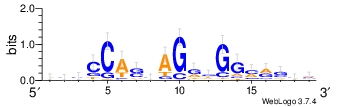

In [86]:
from IPython.display import Image
Image("CTCF.png")

#### Manhattan plot

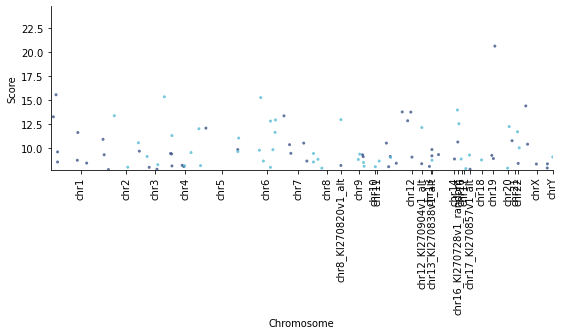

<AxesSubplot:xlabel='Chromosome', ylabel='Score'>

In [108]:
from qmplot import manhattanplot
# https://github.com/ShujiaHuang/qmplot
manhattanplot(data=ctcf.as_df(),
              chrom="Chromosome",
              pos="Start",
              pv="Score",
              snp="Name",
              logp=False,
              ylabel="Score",
              xlabel="Chromosome",
               xticklabel_kws={"rotation": "vertical"},
               is_show=True,  # display the plot in screen
               figname="output_manhattan_plot.png")

## FASTQ format


In [110]:
!zcat test.10K.R1.fastq.gz | head

@M04990:66:000000000-G83PY:1:2101:2222:14575 1:N:0:TCTTCCTTTCCTTTTTTTGTTTTTCCTTCTTTCTCTTTCTTTTTTTTTGTTTTTTTTATTTGGTTTTTTTTTTTTTTTTCCTCTTGCATCTGTTGTTCT+TCTTTCCC
GCTCGACGCCATTAATAATGTTTTCCGTAAATTCAGCGCCTTCCATGATG
+
CCCDDDDCCCCCGGGGGGGGGGHHHHGHHGHHHHHHHGGGGGHHHHHHHH
@M04990:66:000000000-G83PY:1:1102:10573:9495 1:N:0:TCGTCCTCTCCTTGTGCCTGTTTCAATGCGTCCTCGCTCGCACTCACTTTTATCGAAGTGACTCGTTCGCCGTTGTGACACCTCGTCCACGCCAATTAT+TATCCTCT
CAATAGTCGTACGCCGATGCGAAACATCGGCCACGTGTGTCGATCTCGTA
+
CCCCBFFFCBFCGGGGFGGGGGGGGHHHGGGGGGGHHHHHHGHGFHGHGG
@M04990:66:000000000-G83PY:1:1102:15470:5522 1:N:0:CCCCGCCACCGTGGGGCGGGGTGGAAGCATGCGCCGCCCCCCGCCGGGCGGGGCGATGTTTTGTGGTAGCCGCGGCGCAAACACCCCCCCCACTAACCC+AGAGTAGA
CATTGGCACAGCTTGTCTCCAGGACCTTTTATTTTAGAACAAAAAAAAAA

gzip: stdout: Broken pipe



### Syntax:

- Each sequence/read is represented in 4 lines
- first line is read name, followed by some descriptions
- second line is the sequence
- third line is just +
- fourth line is the quality scores, same length as the sequence

### Base qualities, increasing order:
```
 !"#$%&'()*+,-./0123456789:;<=>?@ABCDEFGHIJKLMNOPQRSTUVWXYZ[\]^_`abcdefghijklmnopqrstuvwxyz{|}~
```

## FASTQ examples

### 1. take a look at the fastq files

Usually I just use `less`.

### 2. check sequencing quality

Use `fastqc`

In [112]:
!mkdir test_fastqc
!module load fastqc; fastqc test.10K.R1.fastq.gz -o test_fastqc

Started analysis of test.10K.R1.fastq.gz
Approx 10% complete for test.10K.R1.fastq.gz
Approx 20% complete for test.10K.R1.fastq.gz
Approx 30% complete for test.10K.R1.fastq.gz
Approx 40% complete for test.10K.R1.fastq.gz
Approx 50% complete for test.10K.R1.fastq.gz
Approx 60% complete for test.10K.R1.fastq.gz
Approx 70% complete for test.10K.R1.fastq.gz
Approx 80% complete for test.10K.R1.fastq.gz
Approx 90% complete for test.10K.R1.fastq.gz
Approx 100% complete for test.10K.R1.fastq.gz
Analysis complete for test.10K.R1.fastq.gz


### 3. Random sampling fastq


In [2]:
# sample N reads
!module load seqtk; seqtk sample test.10K.R1.fastq.gz 100 > test.sample.fastq;wc -l test.sample.fastq

400 test.sample.fastq


#### Note that seqtk only output uncompressed fastq, if you want to a fastq.gz file, you have to gzip it 

In [3]:
!module load seqtk; seqtk sample test.10K.R1.fastq.gz 100 > test.sample.fastq;gzip test.sample.fastq;zcat test.sample.fastq.gz|head

@M04990:66:000000000-G83PY:1:2104:15259:7127 1:N:0:TCGGACGATCATGGGTAGACGGACAAGTATGCAGCGCGCTCAAGCACGTGGATTACTTCGGAGTCGTACGCCGATGCGAAACATCGGCCACCAGATCTG+TAGATCGC
ATCCACAACTATCTGAAAAGGTTTATATTAAAATACTGCTCCCAGCCAGG
+
CCCCCFFCCFFFGGGGGGGGGGHHHHHHHHHHHHHHHHHHHHGHHHGHHG
@M04990:66:000000000-G83PY:1:2104:7163:24261 1:N:0:TCGGACGATCATGGGTAGACGGACAAGTATGCAGCGCGCTCAAGCACGTGGATTCTACGACAGTCGTACGCCGATGCGAAACATCGGCCACTTCCATTG+AGAGTAGA
GCCCATGCCCCAGCTCACCTCCATCATCGTCAACCAGCTCAAGAAGATCA
+
AACCAFFFFFCCGGGGGGGGGGHHHHHHHHHHGHGGHGHHHHHHHHHHHH
@M04990:66:000000000-G83PY:1:1103:27097:20242 1:N:0:TCGGACGATCATGGGTCTCACGGCAAGTATGCACGCGCTCAAGCACGTGGATTCTCACGGAGTCGTACGCCGATGCGAAACATCGGCCACGCATGGCTA+TAGATCGC
CTCCCAGGTTCACCTCATTTTCTTTGGCTCTTCAGTCCGCTGGTTTGAGT


In [4]:
# Sample 10% reads
!module load seqtk; seqtk sample test.10K.R1.fastq.gz 0.1 > test.sample.fastq;wc -l test.sample.fastq

4000 test.sample.fastq


Also see: https://hemtools.readthedocs.io/en/latest/content/Bioinformatics_tools/fastqc.html for batch run

### 4. read alignment using BWA


In [119]:
!module load bwa;bwa index hg38.fa

[bwa_index] Pack FASTA... 20.66 sec
[bwa_index] Construct BWT for the packed sequence...
[BWTIncCreate] textLength=6418572210, availableWord=463634060
[BWTIncConstructFromPacked] 10 iterations done. 99999986 characters processed.
[BWTIncConstructFromPacked] 20 iterations done. 199999986 characters processed.
[BWTIncConstructFromPacked] 30 iterations done. 299999986 characters processed.
[BWTIncConstructFromPacked] 40 iterations done. 399999986 characters processed.
[BWTIncConstructFromPacked] 50 iterations done. 499999986 characters processed.
[BWTIncConstructFromPacked] 60 iterations done. 599999986 characters processed.
[BWTIncConstructFromPacked] 70 iterations done. 699999986 characters processed.
[BWTIncConstructFromPacked] 80 iterations done. 799999986 characters processed.
[BWTIncConstructFromPacked] 90 iterations done. 899999986 characters processed.
[BWTIncConstructFromPacked] 100 iterations done. 999999986 characters processed.
[BWTIncConstructFromPacked] 110 iterations done. 

In [116]:
!module load bwa;\
bwa_index=/home/yli11/Data/Human/hg38/bwa_16a_index/hg38.fa;\
bwa mem $bwa_index test.10K.R1.fastq.gz test.10K.R2.fastq.gz > test.sam

[M::bwa_idx_load_from_disk] read 0 ALT contigs
[M::process] read 20000 sequences (1000000 bp)...
[M::mem_pestat] # candidate unique pairs for (FF, FR, RF, RR): (0, 2289, 1, 0)
[M::mem_pestat] skip orientation FF as there are not enough pairs
[M::mem_pestat] analyzing insert size distribution for orientation FR...
[M::mem_pestat] (25, 50, 75) percentile: (62, 168, 228)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 560)
[M::mem_pestat] mean and std.dev: (162.87, 115.26)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 726)
[M::mem_pestat] skip orientation RF as there are not enough pairs
[M::mem_pestat] skip orientation RR as there are not enough pairs
[M::mem_process_seqs] Processed 20000 reads in 2.793 CPU sec, 2.793 real sec
[main] Version: 0.7.12-r1039
[main] CMD: bwa mem /home/yli11/Data/Human/hg38/bwa_16a_index/hg38.fa test.10K.R1.fastq.gz test.10K.R2.fastq.gz
[main] Real time: 22.389 sec; CPU: 4.152 sec


In [187]:
!module avail bwa


------------------------ /hpcf/apps/modules/modulefiles ------------------------
   bwa/0.5.10    bwa/0.7.5a        bwa/0.7.15
   bwa/0.6.1     bwa/0.7.12 (D)    bwa/0.7.16a

---------------- /hpcf/authorized_apps/rhel7_apps/module_files -----------------
   bwa/0.7.17

  Where:
   D:  Default Module

Module defaults are chosen based on Find First Rules due to Name/Version/Version
 modules found in the module tree.
See https://lmod.readthedocs.io/en/latest/060_locating.html for details.

Use "module spider" to find all possible modules and extensions.
Use "module keyword key1 key2 ..." to search for all possible modules matching
any of the "keys".




**IMPORTANT**

Notice that the bwa version is `0.7.12-r1039`, but my index was created by `0.7.16a`, so the aligned results may have some error. Better to use the same bwa version.

## SAM Format

In [122]:
!head -n 30 test.sam

@SQ	SN:chr10	LN:133797422
@SQ	SN:chr11	LN:135086622
@SQ	SN:chr12	LN:133275309
@SQ	SN:chr13	LN:114364328
@SQ	SN:chr14	LN:107043718
@SQ	SN:chr15	LN:101991189
@SQ	SN:chr16	LN:90338345
@SQ	SN:chr17	LN:83257441
@SQ	SN:chr18	LN:80373285
@SQ	SN:chr19	LN:58617616
@SQ	SN:chr1	LN:248956422
@SQ	SN:chr20	LN:64444167
@SQ	SN:chr21	LN:46709983
@SQ	SN:chr22	LN:50818468
@SQ	SN:chr2	LN:242193529
@SQ	SN:chr3	LN:198295559
@SQ	SN:chr4	LN:190214555
@SQ	SN:chr5	LN:181538259
@SQ	SN:chr6	LN:170805979
@SQ	SN:chr7	LN:159345973
@SQ	SN:chr8	LN:145138636
@SQ	SN:chr9	LN:138394717
@SQ	SN:chrM	LN:16569
@SQ	SN:chrX	LN:156040895
@SQ	SN:chrY	LN:57227415
@PG	ID:bwa	PN:bwa	VN:0.7.12-r1039	CL:bwa mem /home/yli11/Data/Human/hg38/bwa_16a_index/hg38.fa test.10K.R1.fastq.gz test.10K.R2.fastq.gz
M04990:66:000000000-G83PY:1:2101:2222:14575	77	*	0	0	*	*	0	0	GCTCGACGCCATTAATAATGTTTTCCGTAAATTCAGCGCCTTCCATGATG	CCCDDDDCCCCCGGGGGGGGGGHHHHGHHGHHHHHHHGGGGGHHHHHHHH	AS:i:0	XS:i:0
M04990:66:000000000-G83PY:1:2101:2222:14575	141	*	0	0	*	*	0	

### For detailed SAM format specification, see the official reference: https://samtools.github.io/hts-specs/SAMv1.pdf

### The header section


In [126]:
!module load samtools/1.7;\
samtools view -H test.sam 

@SQ	SN:chr10	LN:133797422
@SQ	SN:chr11	LN:135086622
@SQ	SN:chr12	LN:133275309
@SQ	SN:chr13	LN:114364328
@SQ	SN:chr14	LN:107043718
@SQ	SN:chr15	LN:101991189
@SQ	SN:chr16	LN:90338345
@SQ	SN:chr17	LN:83257441
@SQ	SN:chr18	LN:80373285
@SQ	SN:chr19	LN:58617616
@SQ	SN:chr1	LN:248956422
@SQ	SN:chr20	LN:64444167
@SQ	SN:chr21	LN:46709983
@SQ	SN:chr22	LN:50818468
@SQ	SN:chr2	LN:242193529
@SQ	SN:chr3	LN:198295559
@SQ	SN:chr4	LN:190214555
@SQ	SN:chr5	LN:181538259
@SQ	SN:chr6	LN:170805979
@SQ	SN:chr7	LN:159345973
@SQ	SN:chr8	LN:145138636
@SQ	SN:chr9	LN:138394717
@SQ	SN:chrM	LN:16569
@SQ	SN:chrX	LN:156040895
@SQ	SN:chrY	LN:57227415
@PG	ID:bwa	PN:bwa	VN:0.7.12-r1039	CL:bwa mem /home/yli11/Data/Human/hg38/bwa_16a_index/hg38.fa test.10K.R1.fastq.gz test.10K.R2.fastq.gz


- @SQ Reference sequence dictionary. The order of @SQ lines defines the alignment sorting order.

- SN: Reference sequence name

- LN: Reference sequence length

### The alignment section

In [127]:
!module load samtools/1.7;\
samtools view test.sam | head

M04990:66:000000000-G83PY:1:2101:2222:14575	77	*	0	0	*	*	0	0	GCTCGACGCCATTAATAATGTTTTCCGTAAATTCAGCGCCTTCCATGATG	CCCDDDDCCCCCGGGGGGGGGGHHHHGHHGHHHHHHHGGGGGHHHHHHHH	AS:i:0	XS:i:0
M04990:66:000000000-G83PY:1:2101:2222:14575	141	*	0	0	*	*	0	0	ATCATGAGTCAAGTTACTGAACAATCCGTACGTTTCCAGACCGCTTTGGC	AABCCFFFFFFFGGGGGGGGGGHHHHHGGHGGHHHHHGHHGHGGGGGHHH	AS:i:0	XS:i:0
M04990:66:000000000-G83PY:1:1102:10573:9495	77	*	0	0	*	*	0	0	CAATAGTCGTACGCCGATGCGAAACATCGGCCACGTGTGTCGATCTCGTA	CCCCBFFFCBFCGGGGFGGGGGGGGHHHGGGGGGGHHHHHHGHGFHGHGG	AS:i:0	XS:i:0
M04990:66:000000000-G83PY:1:1102:10573:9495	141	*	0	0	*	*	0	0	AACTACACAATCAACGACGCCCTCGTCTTCCTTCTCTTCCTTCCTGTCTC	1>111@@BD1F1FB11AE0AE00BA0AF021A2BG1GGFGFD1B111B2D	AS:i:0	XS:i:0
M04990:66:000000000-G83PY:1:1102:15470:5522	83	chr7	113829330	0	21M29S	=	113829329	-22	TTTTTTTTTTGTTCTAAAATAAAAGGTCCTGGAGACAAGCTGTGCCAATG	GEAECGA0GFHFAFHGHHGGGHHHGGC11BGGFGGGGGAFFFFC1A@AAA	NM:i:0	MD:Z:21	AS:i:21	XS:i:21	XA:Z:chr12,+60139811,26S21M3S,0;chr2,-139726748,3S20M27S,0;chr7,+88270

| Col | Field | Type       | N/A Value | Description                             |
|-----|-------|------------|-----------|-----------------------------------------|
| 1   | QNAME | string     | mandatory | The query/read name.                    |
| 2   | FLAG  | int        | mandatory | The record’s flag.                      |
| 3   | RNAME | string     | *         | The reference name.                     |
| 4   | POS   | 32-bit int | 0         | 1-based position on the reference.      |
| 5   | MAPQ  | 8-bit int  | 255       | The mapping quality.                    |
| 6   | CIGAR | string     | *         | The CIGAR string of the alignment.      |
| 7   | RNEXT | string     | *         | The reference of the next mate/segment. |
| 8   | PNEXT | string     | 0         | The position of the next mate/seqgment. |
| 9   | TLEN  | string     | 0         | The observed length of the template.    |
| 10  | SEQ   | string     | *         | The query/read sequence.                |
| 11  | QUAL  | string     | *         | The ASCII PHRED-encoded base qualities. |

Notes:

* The SAM standard talks about "queries".
  In the context of read mapping, where the format originates, queries are reads.
* The SAM standard talks about "templates" and "segments".
  In the case of paired-end and mate-pair mapping the template consists of two segments, each is one read.
  The template length is the insert size.
* Paired-end reads are stored as two alignments records with the same QNAME.
  The first and second mate are discriminated by the FLAG values.
* When the FLAG indicates that SEQ is reverse-complemented, then QUAL is reversed.
* Positions in the SAM file are 1-based.
* The qualities must be stored as ASCII PRED-encoded qualities.
* The query and reference names must not contain whitespace.
  It is common to trim query and reference ids at the first space.
* Getting the exact mapping coordinates directly based on the 4th column is not trivial, better to use bedtools for correctness.
* MAPQ 0 could mean multi-mapped or repeat regions.

### SAM flags

I usually use this online tool to make sense of SAM flags: https://broadinstitute.github.io/picard/explain-flags.html

### BAM format

Binary format for SAM files. An index file (.bai) is usually generated for each position sorted BAM file

### Common Examples

#### 1. Convert SAM to BAM
#### 2. Sort BAM file
#### 3. Index BAM file
#### 4. Get summary statistics

In [131]:
!module load samtools/1.7;samtools view -b test.sam > test.bam

In [132]:
!module load samtools/1.7;samtools sort -o test.st.bam test.bam

In [133]:
!module load samtools/1.7;samtools index test.st.bam 

In [134]:
!module load samtools/1.7;samtools flagstat test.st.bam

20000 + 0 in total (QC-passed reads + QC-failed reads)
0 + 0 secondary
0 + 0 supplementary
0 + 0 duplicates
8455 + 0 mapped (42.27% : N/A)
20000 + 0 paired in sequencing
10000 + 0 read1
10000 + 0 read2
7854 + 0 properly paired (39.27% : N/A)
7994 + 0 with itself and mate mapped
461 + 0 singletons (2.31% : N/A)
62 + 0 with mate mapped to a different chr
23 + 0 with mate mapped to a different chr (mapQ>=5)


In [135]:
!module load samtools/1.7;samtools idxstats test.st.bam

chr10	133797422	277	22
chr11	135086622	326	22
chr12	133275309	307	22
chr13	114364328	143	14
chr14	107043718	215	16
chr15	101991189	169	8
chr16	90338345	238	11
chr17	83257441	261	14
chr18	80373285	116	4
chr19	58617616	312	13
chr1	248956422	681	36
chr20	64444167	160	3
chr21	46709983	413	39
chr22	50818468	115	7
chr2	242193529	629	40
chr3	198295559	410	27
chr4	190214555	311	15
chr5	181538259	397	22
chr6	170805979	541	23
chr7	159345973	356	18
chr8	145138636	520	24
chr9	138394717	295	21
chrM	16569	1029	28
chrX	156040895	196	10
chrY	57227415	38	2
*	0	0	11084


In [7]:
!module load samtools/1.7;samtools stats test.st.bam | head -n 50

# This file was produced by samtools stats (1.7+htslib-1.7) and can be plotted using plot-bamstats
# This file contains statistics for all reads.
# The command line was:  stats test.st.bam
# CHK, Checksum	[2]Read Names	[3]Sequences	[4]Qualities
# CHK, CRC32 of reads which passed filtering followed by addition (32bit overflow)
CHK	fae7cc8c	e08cae0b	f53795c5
# Summary Numbers. Use `grep ^SN | cut -f 2-` to extract this part.
SN	raw total sequences:	20000
SN	filtered sequences:	0
SN	sequences:	20000
SN	is sorted:	1
SN	1st fragments:	10000
SN	last fragments:	10000
SN	reads mapped:	8455
SN	reads mapped and paired:	7994	# paired-end technology bit set + both mates mapped
SN	reads unmapped:	11545
SN	reads properly paired:	7854	# proper-pair bit set
SN	reads paired:	20000	# paired-end technology bit set
SN	reads duplicated:	0	# PCR or optical duplicate bit set
SN	reads MQ0:	1325	# mapped and MQ=0
SN	reads QC failed:	0
SN	non-primary alignments:	0
SN	total length:	1000000	# ignores clipping
SN	

#### For mapping multiple samples, use the bwa_mem pipeline

https://hemtools.readthedocs.io/en/latest/content/NGS_pipelines/bwa_mem.html

```

module load python/2.7.13

run_lsf.py --guess_input

run_lsf.py -f fastq.tsv -p bwa_mem -g mm9

```


####  5. visualize bam file in IGV

* reads are sub-sampled
* highligh a specific read
* view as pairs
* sort reads by mapping start


#### 6. remove PCR duplicates (rmdup or dedup)

What is PCR duplicates? Simply put, identical reads. More precisely, the positions on 5'-end are identical. (that means 3'-end can be different)

For single-end sequencing, rmdup is usually not performed. 

For paired-end sequencing, rmdup may be performed.

We never perform rmdup for RNA-seq or amplicon sequencing data.



In [148]:
!module load samtools/1.7; \
samtools sort -n -o test.name.st.bam test.st.bam; \
samtools fixmate -m test.name.st.bam test.fixmate.bam; \
samtools sort -o test.fixmate.st.bam test.fixmate.bam; \
samtools markdup test.fixmate.st.bam test.markdup.st.bam; \
samtools markdup -r -s test.markdup.st.bam test.rmdup.st.bam

READ 20000 WRITTEN 19985 
EXCLUDED 11545 EXAMINED 8455
PAIRED 7994 SINGLE 461
DULPICATE PAIR 10 DUPLICATE SINGLE 5
DUPLICATE TOTAL 15


In [152]:
!module load samtools/1.7; samtools view -H test.fixmate.bam

@HD	VN:1.5	SO:queryname
@SQ	SN:chr10	LN:133797422
@SQ	SN:chr11	LN:135086622
@SQ	SN:chr12	LN:133275309
@SQ	SN:chr13	LN:114364328
@SQ	SN:chr14	LN:107043718
@SQ	SN:chr15	LN:101991189
@SQ	SN:chr16	LN:90338345
@SQ	SN:chr17	LN:83257441
@SQ	SN:chr18	LN:80373285
@SQ	SN:chr19	LN:58617616
@SQ	SN:chr1	LN:248956422
@SQ	SN:chr20	LN:64444167
@SQ	SN:chr21	LN:46709983
@SQ	SN:chr22	LN:50818468
@SQ	SN:chr2	LN:242193529
@SQ	SN:chr3	LN:198295559
@SQ	SN:chr4	LN:190214555
@SQ	SN:chr5	LN:181538259
@SQ	SN:chr6	LN:170805979
@SQ	SN:chr7	LN:159345973
@SQ	SN:chr8	LN:145138636
@SQ	SN:chr9	LN:138394717
@SQ	SN:chrM	LN:16569
@SQ	SN:chrX	LN:156040895
@SQ	SN:chrY	LN:57227415
@PG	ID:bwa	PN:bwa	VN:0.7.12-r1039	CL:bwa mem /home/yli11/Data/Human/hg38/bwa_16a_index/hg38.fa test.10K.R1.fastq.gz test.10K.R2.fastq.gz


In [150]:
!module load samtools/1.7; samtools view -H test.rmdup.st.bam 

@HD	VN:1.5	SO:coordinate
@SQ	SN:chr10	LN:133797422
@SQ	SN:chr11	LN:135086622
@SQ	SN:chr12	LN:133275309
@SQ	SN:chr13	LN:114364328
@SQ	SN:chr14	LN:107043718
@SQ	SN:chr15	LN:101991189
@SQ	SN:chr16	LN:90338345
@SQ	SN:chr17	LN:83257441
@SQ	SN:chr18	LN:80373285
@SQ	SN:chr19	LN:58617616
@SQ	SN:chr1	LN:248956422
@SQ	SN:chr20	LN:64444167
@SQ	SN:chr21	LN:46709983
@SQ	SN:chr22	LN:50818468
@SQ	SN:chr2	LN:242193529
@SQ	SN:chr3	LN:198295559
@SQ	SN:chr4	LN:190214555
@SQ	SN:chr5	LN:181538259
@SQ	SN:chr6	LN:170805979
@SQ	SN:chr7	LN:159345973
@SQ	SN:chr8	LN:145138636
@SQ	SN:chr9	LN:138394717
@SQ	SN:chrM	LN:16569
@SQ	SN:chrX	LN:156040895
@SQ	SN:chrY	LN:57227415
@PG	ID:bwa	PN:bwa	VN:0.7.12-r1039	CL:bwa mem /home/yli11/Data/Human/hg38/bwa_16a_index/hg38.fa test.10K.R1.fastq.gz test.10K.R2.fastq.gz


#### 7. remove multi-mapped reads (uq)


In [153]:
!module load samtools/1.7; samtools view -q 1 -b test.rmdup.st.bam > test.rmdup.uq.st.bam

#### 8. filter reads by SAM flags

* -f INT   only include reads with all  of the FLAGs in INT present [0]

* -F INT   only include reads with none of the FLAGS in INT present [0]


#### -f 2 -F 4 -F 8 -F 256 -F 512 -F 2048

In [155]:
!module load samtools/1.7; samtools view -f 2 -F 4 -F 8 -F 256 -F 512 -F 2048 -b test.rmdup.uq.st.bam > test.valid_pairs.rmdup.uq.st.bam

#### 9.1 subset SAM/BAM files using samtools view based on coordinates

In [159]:
# subset by a single region
!module load samtools/1.7; samtools index test.valid_pairs.rmdup.uq.st.bam;\
samtools view test.valid_pairs.rmdup.uq.st.bam "chr10:610000-660000"

M04990:66:000000000-G83PY:1:2101:19247:11601	163	chr10	613723	60	50M	=	613849	176	CCTCTCCACACCCTGGTAAACATGGCATTTCGCACACCTGCTTTGGTCCC	>AABAFFFFFDDGGGGGGGGGGHHHHHHHHHHGGGGHGHHHHHHGHHHHH	NM:i:0	MD:Z:50	AS:i:50	XS:i:0	MQ:i:60	MC:Z:50M	ms:i:1872
M04990:66:000000000-G83PY:1:2101:19247:11601	83	chr10	613849	60	50M	=	613723	-176	TTCCCCGGCCACCCTCCTGATCTCGGCCATCTGATGGCATCACTCCCCAC	GGGGGGHHGGGGGGHHHHHGGGGGHHHHGGGGGGGGGGFFFBCCDDCCBC	NM:i:0	MD:Z:50	AS:i:50	XS:i:0	MQ:i:60	MC:Z:50M	ms:i:1879


In [160]:
# subset by a bed file
!module load samtools/1.7; \
samtools view test.valid_pairs.rmdup.uq.st.bam -L ctcfpos.bed

M04990:66:000000000-G83PY:1:1101:17665:21940	83	chr6	30617302	60	50M	=	30617169	-183	CGTGCTAGTGAAACGCCCTTGTCGCGAGACATTATACGCGAGGCGTGAAC	GHHHHHHHHFGGGGGGHHGGGGGFGGHHGGGGGGGGGGBCFCFBFBCCCC	NM:i:0	MD:Z:50	AS:i:50	XS:i:0	MQ:i:60	MC:Z:50M	ms:i:1855
M04990:66:000000000-G83PY:1:2104:3420:8655	163	chr6	36842224	60	50M	=	36842603	429	CACATGCTGTGTGCTGGGTGCAGTCCTAGGCTCAGAGAATAAAAGGCAAA	>>A3>BFFFFFFGGGGC2GEA4DFGHHHCBAGHHFFBFFHHFFF5AGAF2	NM:i:0	MD:Z:50	AS:i:50	XS:i:19	MQ:i:40	MC:Z:50M	ms:i:1875


#### 9.2 subset SAM/BAM files using bedtools intersect based on coordinates

In [162]:
!module load bedtools; \
bedtools intersect -a test.valid_pairs.rmdup.uq.st.bam -b ctcfpos.bed | samtools view

M04990:66:000000000-G83PY:1:1101:17665:21940	83	chr6	30617302	60	50M	=	30617169	-183	CGTGCTAGTGAAACGCCCTTGTCGCGAGACATTATACGCGAGGCGTGAAC	GHHHHHHHHFGGGGGGHHGGGGGFGGHHGGGGGGGGGGBCFCFBFBCCCC	NM:i:0	MD:Z:50	AS:i:50	XS:i:0	MQ:i:60	MC:Z:50M	ms:i:1855
M04990:66:000000000-G83PY:1:2104:3420:8655	163	chr6	36842224	60	50M	=	36842603	429	CACATGCTGTGTGCTGGGTGCAGTCCTAGGCTCAGAGAATAAAAGGCAAA	>>A3>BFFFFFFGGGGC2GEA4DFGHHHCBAGHHFFBFFHHFFF5AGAF2	NM:i:0	MD:Z:50	AS:i:50	XS:i:19	MQ:i:40	MC:Z:50M	ms:i:1875


In [169]:
!module load bedtools; \
bedtools intersect -a test.valid_pairs.rmdup.uq.st.bam -b ctcfpos.bed | bedtools bamtofastq -i - -fq test.fq | head test.fq

@M04990:66:000000000-G83PY:1:1101:17665:21940
GTTCACGCCTCGCGTATAATGTCTCGCGACAAGGGCGTTTCACTAGCACG
+
CCCCBFBFCFCBGGGGGGGGGGHHGGFGGGGGHHGGGGGGFHHHHHHHHG
@M04990:66:000000000-G83PY:1:2104:3420:8655
CACATGCTGTGTGCTGGGTGCAGTCCTAGGCTCAGAGAATAAAAGGCAAA
+
>>A3>BFFFFFFGGGGC2GEA4DFGHHHCBAGHHFFBFFHHFFF5AGAF2


#### 9.3 subset SAM/BAM files using picard based on read list

In [176]:
!echo M04990:66:000000000-G83PY:1:1101:17665:21940 > test.list
!echo M04990:66:000000000-G83PY:1:2104:3420:8655 >> test.list
!head test.list

M04990:66:000000000-G83PY:1:1101:17665:21940
M04990:66:000000000-G83PY:1:2104:3420:8655


In [177]:
!module load java/10.0.2;\
java -jar /hpcf/apps/picard/install/2.9.4/picard.jar\
FilterSamReads I=test.valid_pairs.rmdup.uq.st.bam O=test.out.bam READ_LIST_FILE=test.list FILTER=includeReadList;\
module load samtools;samtools view test.out.bam

Picked up _JAVA_OPTIONS: -Djava.io.tmpdir=/research/rgs01/scratch_lsf/java -XX:ParallelGCThreads=1
[Tue Aug 17 00:31:03 CDT 2021] picard.sam.FilterSamReads INPUT=test.valid_pairs.rmdup.uq.st.bam FILTER=includeReadList [OUTPUT SAM/BAM will contain reads that are supplied in the READ_LIST_FILE file] READ_LIST_FILE=test.list OUTPUT=test.out.bam    WRITE_READS_FILES=true VERBOSITY=INFO QUIET=false VALIDATION_STRINGENCY=STRICT COMPRESSION_LEVEL=5 MAX_RECORDS_IN_RAM=500000 CREATE_INDEX=false CREATE_MD5_FILE=false GA4GH_CLIENT_SECRETS=client_secrets.json
[Tue Aug 17 00:31:03 CDT 2021] Executing as yli11@noderome182 on Linux 3.10.0-1160.15.2.el7.x86_64 amd64; Java HotSpot(TM) 64-Bit Server VM 10.0.2+13; Picard version: 2.9.4-SNAPSHOT
INFO	2021-08-17 00:31:03	FilterSamReads	Filtering [presorted=true] test.valid_pairs.rmdup.uq.st.bam -> OUTPUT=test.out.bam [sortorder=coordinate]
INFO	2021-08-17 00:31:03	FilterSamReads	4 SAMRecords written to test.out.bam
[Tue Aug 17 00:31:03 CDT 2021] picard.sam

#### 10. Bam to fastq

In [178]:
!module load bedtools;bedtools bamtofastq -i test.valid_pairs.rmdup.uq.st.bam -fq test.fq | head test.fq

@M04990:66:000000000-G83PY:1:1101:17665:21940
GTTCACGCCTCGCGTATAATGTCTCGCGACAAGGGCGTTTCACTAGCACG
+
CCCCBFBFCFCBGGGGGGGGGGHHGGFGGGGGHHGGGGGGFHHHHHHHHG
@M04990:66:000000000-G83PY:1:2104:3420:8655
CACATGCTGTGTGCTGGGTGCAGTCCTAGGCTCAGAGAATAAAAGGCAAA
+
>>A3>BFFFFFFGGGGC2GEA4DFGHHHCBAGHHFFBFFHHFFF5AGAF2


#### get fastq using seqtk

In [184]:
# Here, we are missing the index reads, because they are not part of the read names
# If we want to take a look at the index reads, we can use seqtk to subset fastq files
# Also, sometimes the input fastq to BWA mem is pre-processed (i.e., trimed), so if 
# we want to see the raw reads, we need to subset raw fastq
!module load bedtools; \
bedtools intersect -a test.valid_pairs.rmdup.uq.st.bam -b ctcfpos.bed | samtools view

M04990:66:000000000-G83PY:1:1101:17665:21940	83	chr6	30617302	60	50M	=	30617169	-183	CGTGCTAGTGAAACGCCCTTGTCGCGAGACATTATACGCGAGGCGTGAAC	GHHHHHHHHFGGGGGGHHGGGGGFGGHHGGGGGGGGGGBCFCFBFBCCCC	NM:i:0	MD:Z:50	AS:i:50	XS:i:0	MQ:i:60	MC:Z:50M	ms:i:1855
M04990:66:000000000-G83PY:1:2104:3420:8655	163	chr6	36842224	60	50M	=	36842603	429	CACATGCTGTGTGCTGGGTGCAGTCCTAGGCTCAGAGAATAAAAGGCAAA	>>A3>BFFFFFFGGGGC2GEA4DFGHHHCBAGHHFFBFFHHFFF5AGAF2	NM:i:0	MD:Z:50	AS:i:50	XS:i:19	MQ:i:40	MC:Z:50M	ms:i:1875


In [186]:
!module load bedtools seqtk; \
bedtools intersect -a test.valid_pairs.rmdup.uq.st.bam -b ctcfpos.bed | samtools view | cut -f 1 > read.list ;\
seqtk subseq test.10K.R1.fastq.gz read.list

@M04990:66:000000000-G83PY:1:2104:3420:8655 1:N:0:TCGGACGATCATGGGTAGACGGACAAGTATGCAGCGCGCTCAAGCACGTGGATTACCGAGCAGTCGTACGCCGATGCGAAACATCGGCCACTCTACGAC+TAGATCGC
GGCTGGAGTGCAGTGGTGCGATCTCGGCTCACTGCAACCTCTGCCTCCCA
+
ABBBBBFFFFFFGGGGGFGFGGGHHHGGGGFHHBHHHHHHHHHHHHHHGH
@M04990:66:000000000-G83PY:1:1101:17665:21940 1:N:0:TCGGACGATCATGGGTGATACGTCAAGTATGCAGCGCGCTCAAGCACGTGGATTGTACCTTAGTCGTACGCCGATGCGAAACATCGGCCACTTCTGTGT+TAGATCGC
GTTCACGCCTCGCGTATAATGTCTCGCGACAAGGGCGTTTCACTAGCACG
+
CCCCBFBFCFCBGGGGGGGGGGHHGGFGGGGGHHGGGGGGFHHHHHHHHG


## BED examples

### bed overlaps using intervene

https://intervene.readthedocs.io/en/latest/index.html

In [189]:
!ls bedtools_test/*bed

bedtools_test/B_cell.bed    bedtools_test/HSPC_LOC.bed
bedtools_test/CD34_D0.bed   bedtools_test/mono_cell.bed
bedtools_test/Ery_cell.bed  bedtools_test/T_cell.bed


In [203]:
!intervene upset --figtype png -i bedtools_test/*bed -o upset_plot --save-overlaps


Running UpSet module. Please wait...


You are done! Please check your results @ upset_plot. 
Thank you for using Intervene!



In [204]:
!ls upset_plot/* | head

upset_plot/Intervene_upset_combinations.txt
upset_plot/Intervene_upset.pdf
upset_plot/Intervene_upset.png
upset_plot/Intervene_upset.R

upset_plot/sets:
000001_T_cell.bed
000010_mono_cell.bed
000011_mono_cell_T_cell.bed
001000_Ery_cell.bed


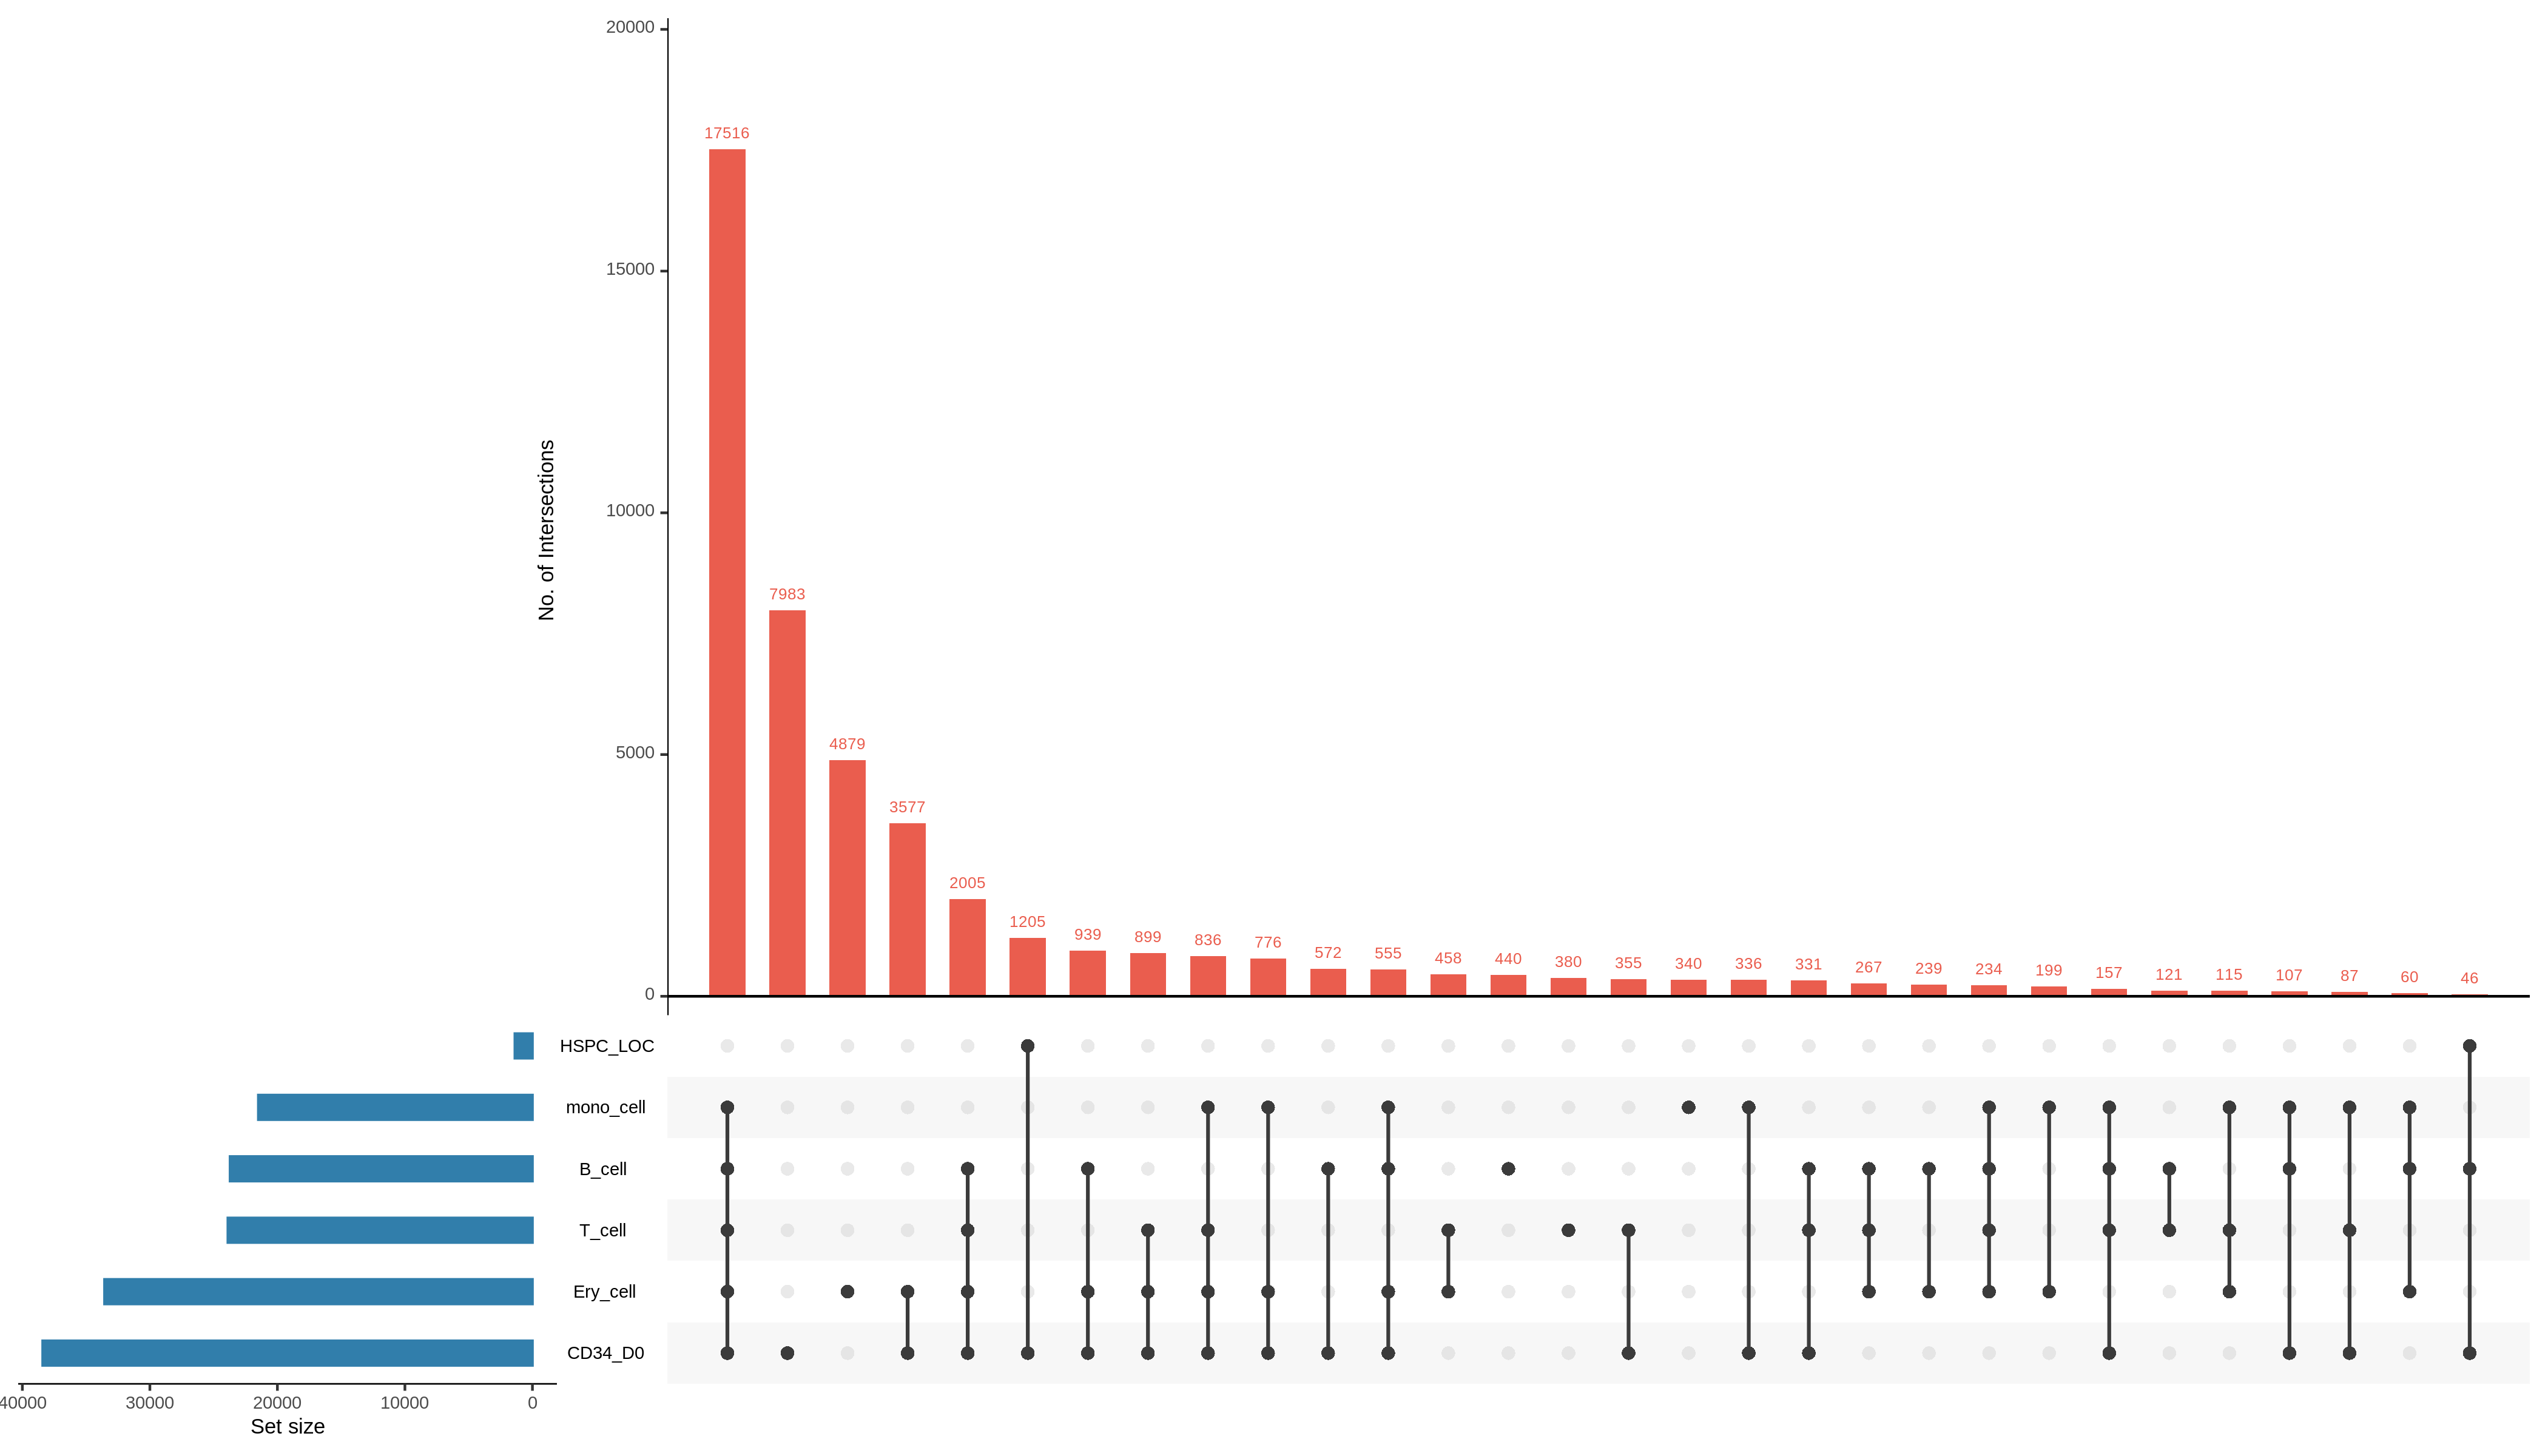

In [205]:
from IPython.display import Image
Image("upset_plot/Intervene_upset.png")


In [206]:
!intervene pairwise --figtype png -i bedtools_test/*bed -o pairwise_frac_plot --compute frac --htype pie


Performing a pairwise intersection analysis. Please wait...


You are done! Please check your results @ pairwise_frac_plot. 
Thank you for using Intervene!



In [207]:
!ls pairwise_frac_plot/* | head

pairwise_frac_plot/Intervene_pairwise_frac_matrix.txt
pairwise_frac_plot/Intervene_pairwise_frac.png
pairwise_frac_plot/Intervene_pairwise_frac.R


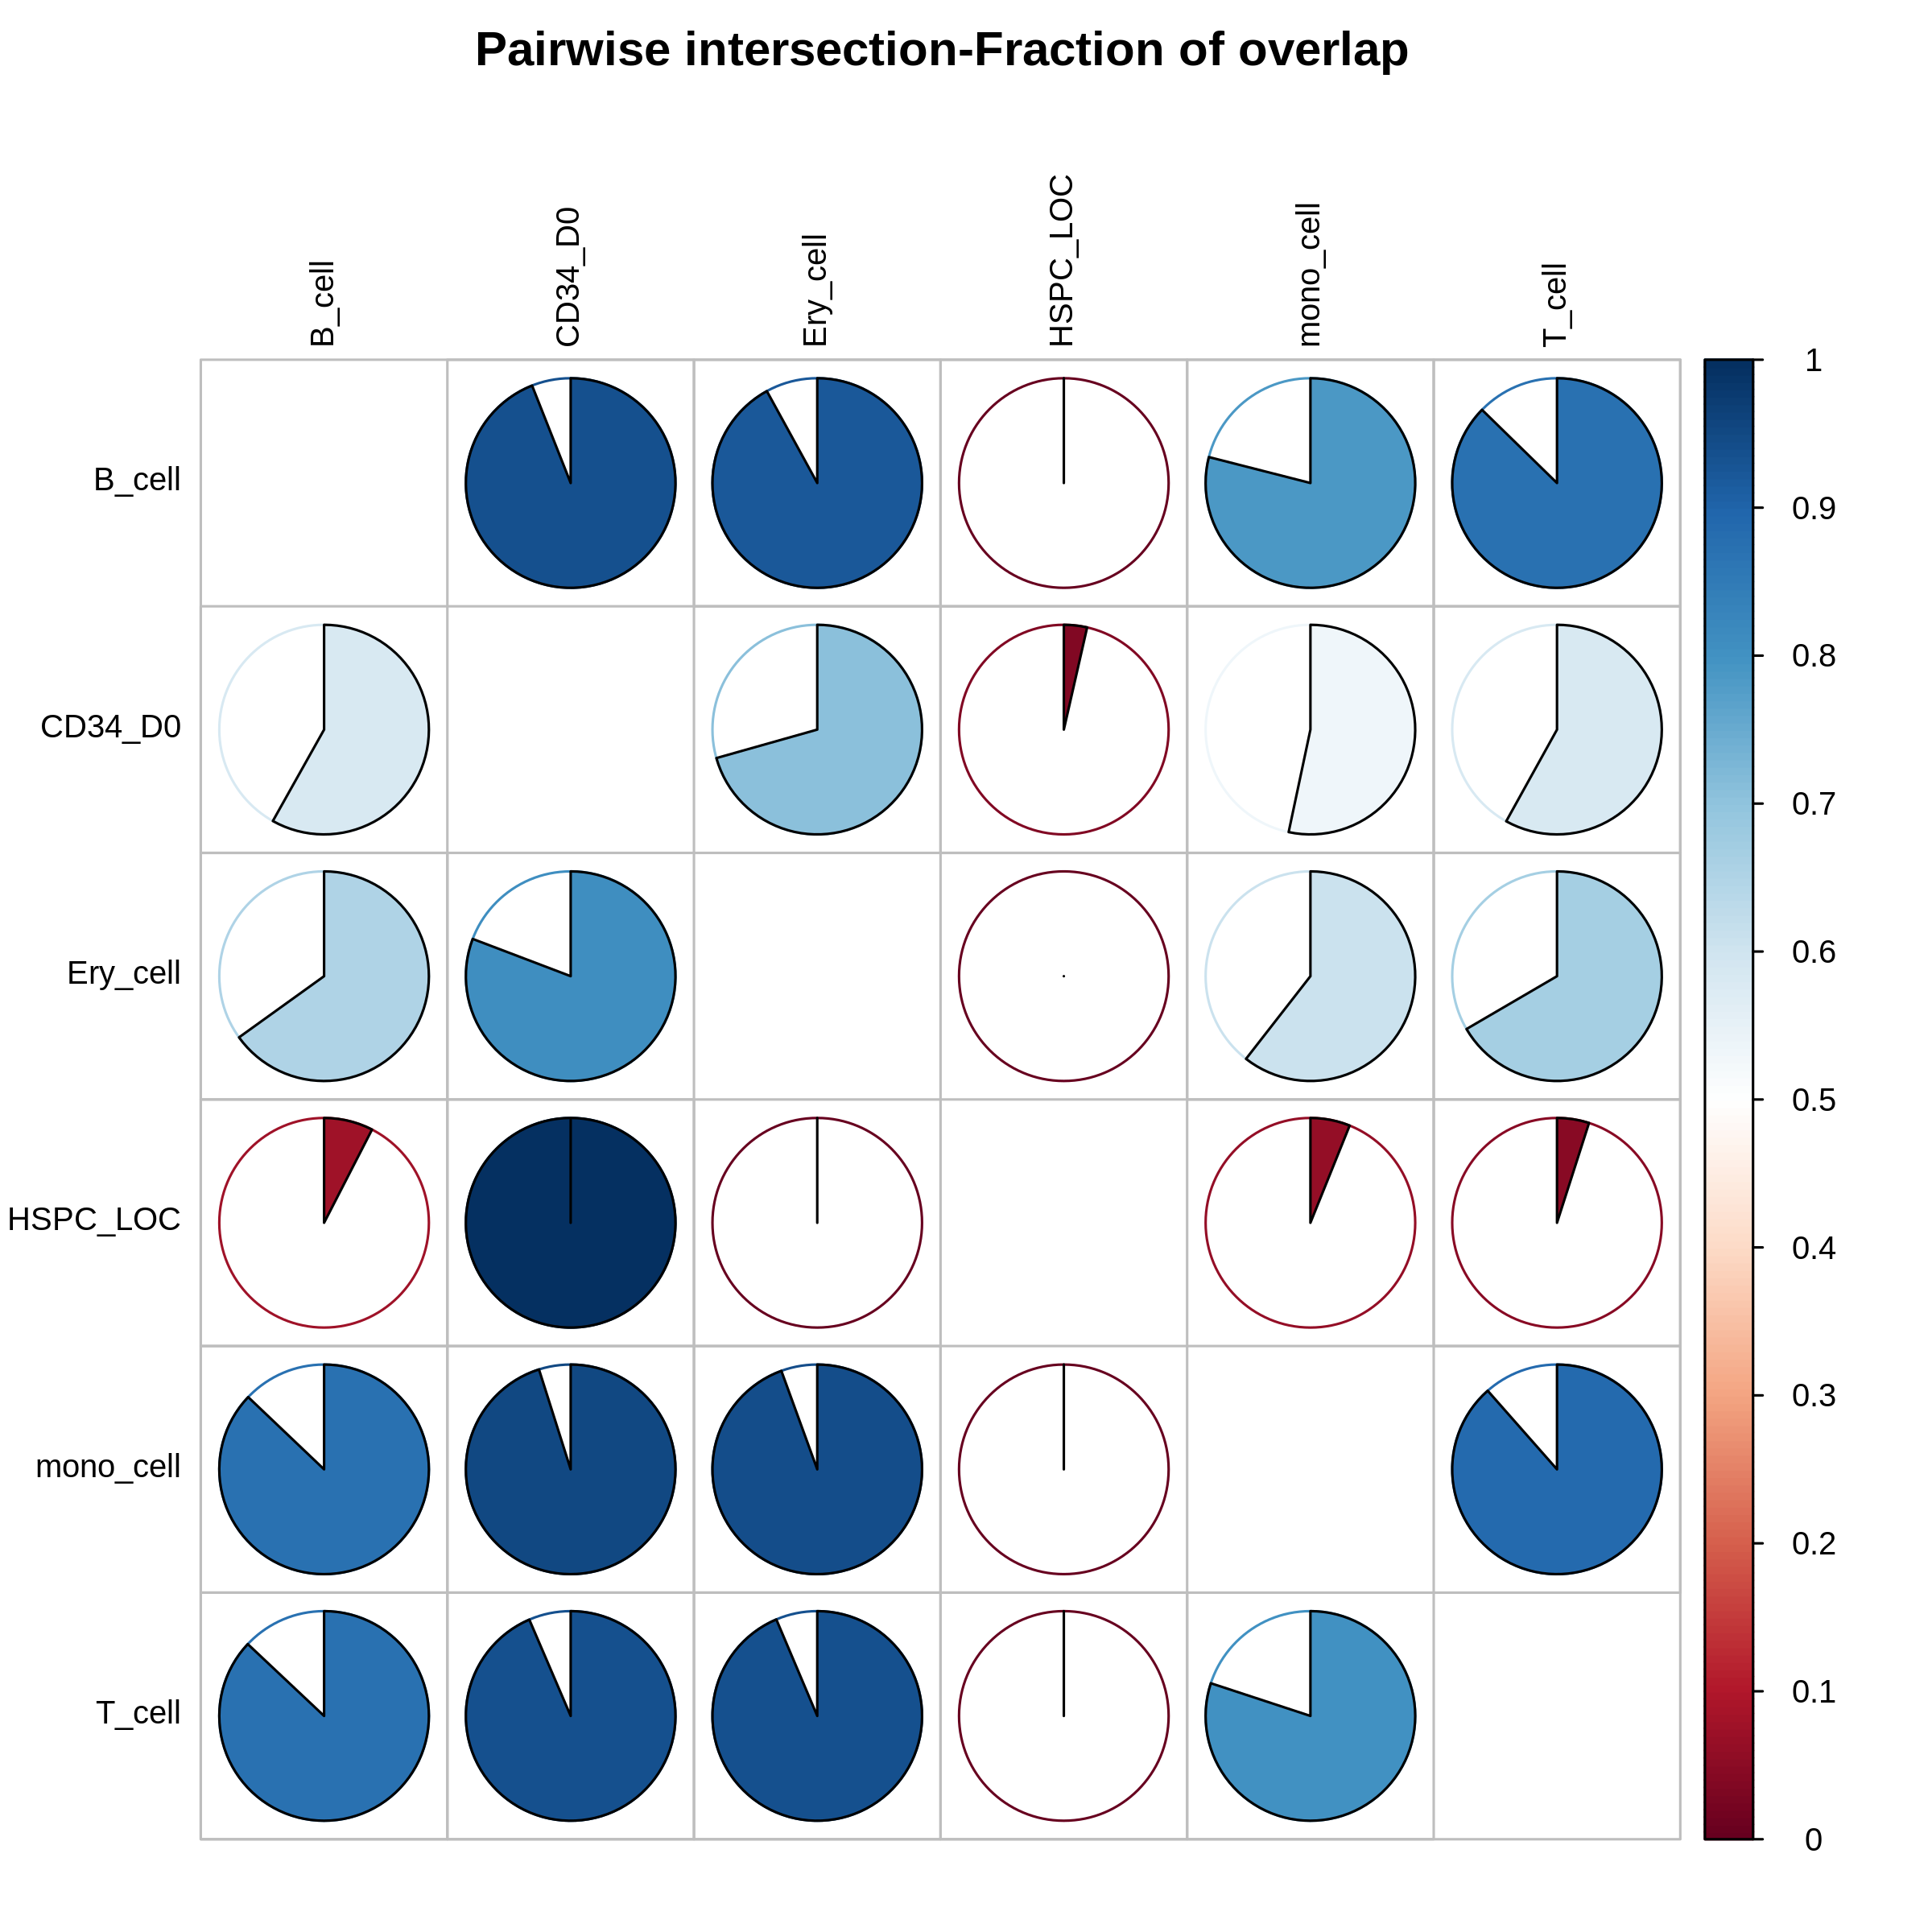

In [222]:
from IPython.display import Image
Image("pairwise_frac_plot/Intervene_pairwise_frac.png", width=500, height=500)


In [209]:
!intervene venn --figtype png -i bedtools_test/*bed -o venn_plot --save-overlaps


Generating a 6-way "venn" diagram. Please wait...


Done! Please check your results @ venn_plot. 
Thank you for using Intervene!



In [210]:
!ls venn_plot/* | head

venn_plot/Intervene_venn.png

venn_plot/sets:
000001_T_cell.bed
000010_mono_cell.bed
000011_mono_cell_T_cell.bed
001000_Ery_cell.bed
001001_Ery_cell_T_cell.bed
001010_Ery_cell_mono_cell.bed
001011_Ery_cell_mono_cell_T_cell.bed


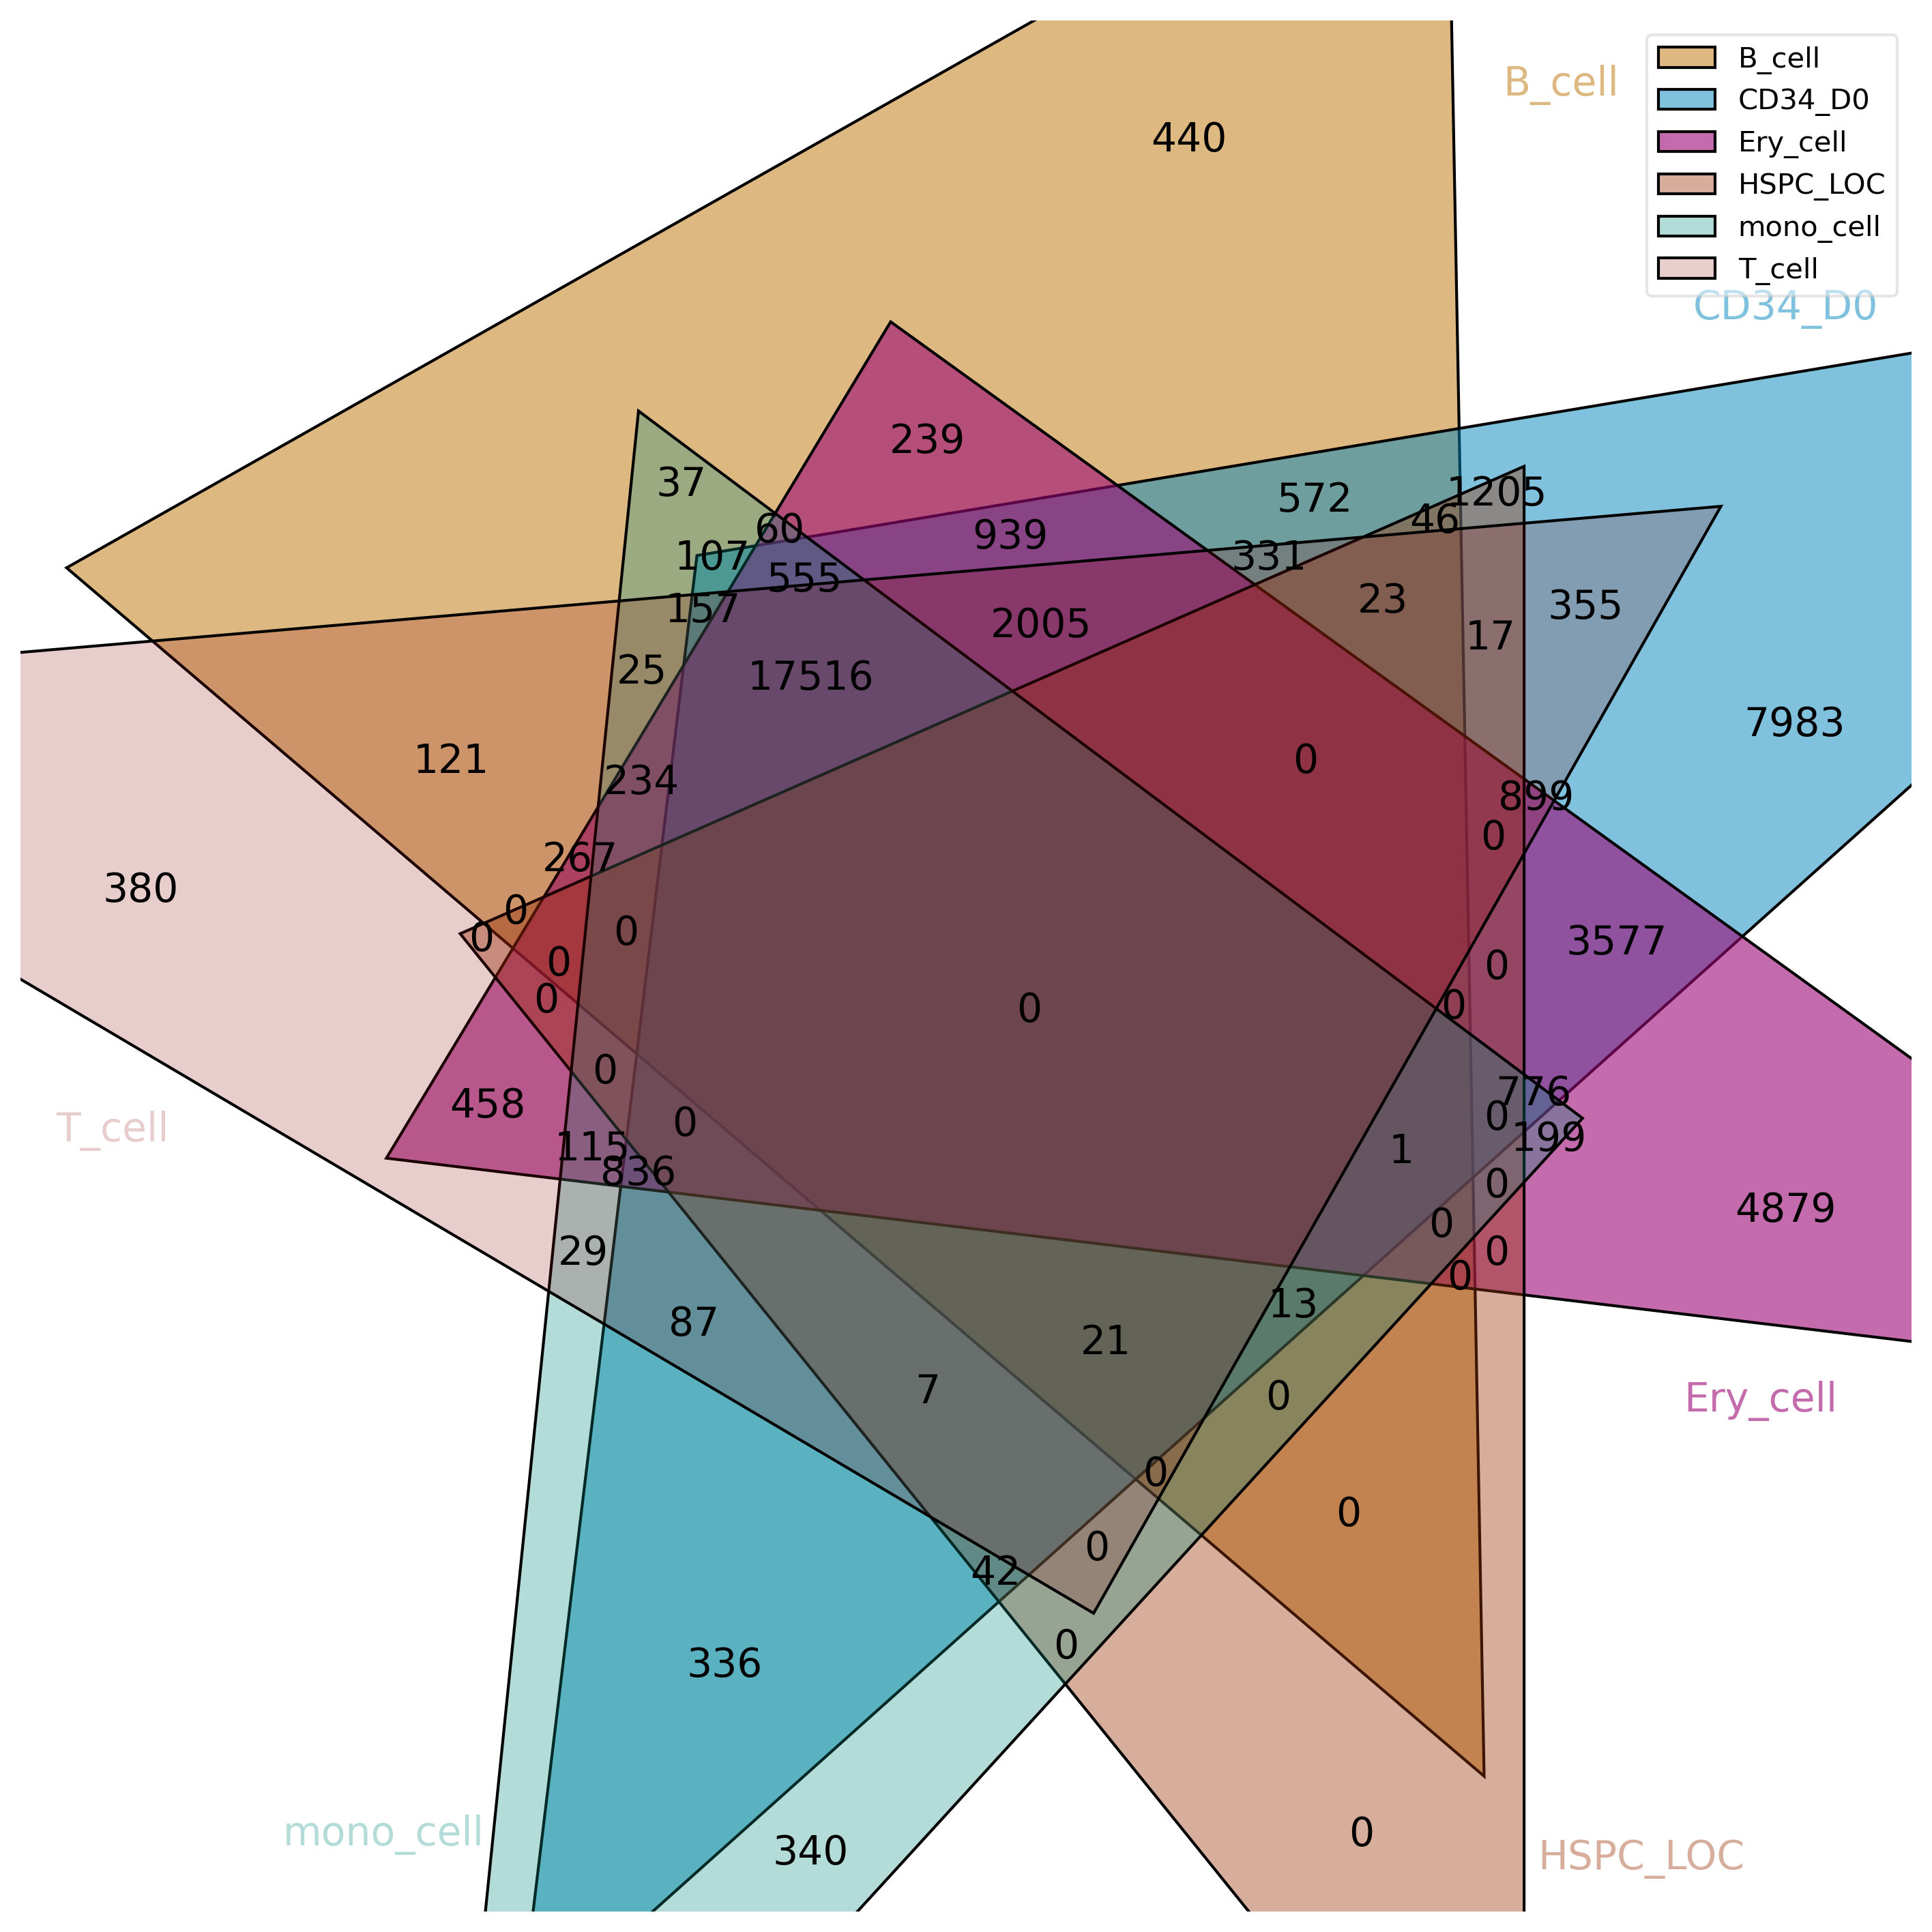

In [220]:
from IPython.display import Image
Image("venn_plot/Intervene_venn.png", width=500, height=500)


### BEDTools

In [223]:
!bedtools

bedtools is a powerful toolset for genome arithmetic.

Version:   v2.30.0
About:     developed in the quinlanlab.org and by many contributors worldwide.
Docs:      http://bedtools.readthedocs.io/
Code:      https://github.com/arq5x/bedtools2
Mail:      https://groups.google.com/forum/#!forum/bedtools-discuss

Usage:     bedtools <subcommand> [options]

The bedtools sub-commands include:

[ Genome arithmetic ]
    intersect     Find overlapping intervals in various ways.
    window        Find overlapping intervals within a window around an interval.
    closest       Find the closest, potentially non-overlapping interval.
    coverage      Compute the coverage over defined intervals.
    map           Apply a function to a column for each overlapping interval.
    genomecov     Compute the coverage over an entire genome.
    merge         Combine overlapping/nearby intervals into a single interval.
    cluster       Cluster (but don't merge) overlapping/nearby intervals.
    complement

### Most common bedtools commands

* intersect,     Find overlapping intervals in various ways.
* closest,       Find the closest, potentially non-overlapping interval.
* merge,         Combine overlapping/nearby intervals into a single interval.
* slop,          Adjust the size of intervals.
* sort ,         Order the intervals in a file.

Other subcommand usage is very similar, you can read invidual documentation for more details. Just google bedtools

#### bedtools intersect

In [226]:
!ls hg19-blacklist.v2.bed.gz

hg19-blacklist.v2.bed.gz


In [227]:
!ls *bed

bd9835eb2b5b.bed      example.bed			 matches.bed.bed
ca218748b8db.bed      get_promoter_yli11_2019-12-10.bed  out.bed
CTCF.hg38.random.bed  get_promoter_yli11_2019-12-18.bed  output.bed
ctcfneg_1x.bed	      get_promoter_yli11_2020-01-06.bed  test23.bed
ctcfpos.bed	      input.bed				 test2.bed
ctcfpos.neg.bed       input.bed.assigned_targets.bed	 test.bed
d3.bed		      loci.bed				 tmp.out.bed
df1.bed		      ma.bed
df2.bed		      matches.bed


In [229]:
!bedtools intersect -a ctcfpos.neg.bed -b hg19-blacklist.v2.bed.gz | head

chr17	19033560	19033878
chr22	16741870	16742161
chr22	15446088	15446374
chr1	144198266	144198544
chr8	12379842	12380140
chr22	16266062	16266356
chr22	21843468	21843748
chr5	69578590	69578870
chrX	114989405	114989716
chr12	495349	495656


In [230]:
!bedtools intersect -a ctcfpos.neg.bed -b hg19-blacklist.v2.bed.gz | bedtools sort -i - | head

chr1	121146526	121146821
chr1	142089885	142090188
chr1	144198266	144198544
chr11	1148412	1148715
chr12	495349	495656
chr14	18713048	18713369
chr14	19136813	19137201
chr15	19568430	19568738
chr15	19973033	19973368
chr15	21664313	21664604


In [232]:
!bedtools intersect -b ctcfpos.neg.bed -a hg19-blacklist.v2.bed.gz -u | bedtools sort -i - | head

chr1	120926100	121149300	High Signal Region
chr1	121341500	145396500	High Signal Region
chr11	1141100	1214300	High Signal Region
chr12	479900	531700	High Signal Region
chr14	0	20303800	High Signal Region
chr15	0	20166200	High Signal Region
chr15	20200400	22365100	High Signal Region
chr15	30358500	30919300	High Signal Region
chr15	32445900	32915200	High Signal Region
chr15	82582300	83213900	High Signal Region


In [233]:
!bedtools intersect -b ctcfpos.neg.bed -a hg19-blacklist.v2.bed.gz | bedtools sort -i - | head

chr1	121146526	121146821	High Signal Region
chr1	142089885	142090188	High Signal Region
chr1	144198266	144198544	High Signal Region
chr11	1148412	1148715	High Signal Region
chr12	495349	495656	High Signal Region
chr14	18713048	18713369	High Signal Region
chr14	19136813	19137201	High Signal Region
chr15	19568430	19568738	High Signal Region
chr15	19973033	19973368	High Signal Region
chr15	21664313	21664604	High Signal Region


#### remove black list regions

In [234]:
!bedtools intersect -a ctcfpos.neg.bed -b hg19-blacklist.v2.bed.gz -v -wa | bedtools sort -i - | head

chr1	1261101	1261398
chr1	1729311	1729599
chr1	2245235	2245525
chr1	3153860	3154143
chr1	3244752	3245042
chr1	3418422	3418758
chr1	4443875	4444191
chr1	5243988	5244261
chr1	5641142	5641440
chr1	6010760	6011094


In [237]:
!bedtools intersect -a ctcfpos.neg.bed -b hg19-blacklist.v2.bed.gz -wa -wb | bedtools sort -i - | head

chr1	121146526	121146821	chr1	120926100	121149300	High Signal Region
chr1	142089885	142090188	chr1	121341500	145396500	High Signal Region
chr1	144198266	144198544	chr1	121341500	145396500	High Signal Region
chr11	1148412	1148715	chr11	1141100	1214300	High Signal Region
chr12	495349	495656	chr12	479900	531700	High Signal Region
chr14	18713048	18713369	chr14	0	20303800	High Signal Region
chr14	19136813	19137201	chr14	0	20303800	High Signal Region
chr15	19568430	19568738	chr15	0	20166200	High Signal Region
chr15	19973033	19973368	chr15	0	20166200	High Signal Region
chr15	21664313	21664604	chr15	20200400	22365100	High Signal Region


In [246]:
!bedtools intersect -b ctcfpos.neg.bed -a hg19-blacklist.v2.bed.gz -wa 

chr11	1141100	1214300	High Signal Region
chr12	479900	531700	High Signal Region
chr14	0	20303800	High Signal Region
chr14	0	20303800	High Signal Region
chr15	0	20166200	High Signal Region
chr15	0	20166200	High Signal Region
chr15	20200400	22365100	High Signal Region
chr15	20200400	22365100	High Signal Region
chr15	30358500	30919300	High Signal Region
chr15	32445900	32915200	High Signal Region
chr15	82582300	83213900	High Signal Region
chr15	82582300	83213900	High Signal Region
chr17	4734800	4736700	Low Mappability
chr17	18928600	19140800	High Signal Region
chr17	22207000	25341300	High Signal Region
chr17	22207000	25341300	High Signal Region
chr18	15293900	18552900	High Signal Region
chr1	120926100	121149300	High Signal Region
chr1	121341500	145396500	High Signal Region
chr1	121341500	145396500	High Signal Region
chr21	9594900	10366000	High Signal Region
chr22	0	16962100	High Signal Region
chr22	0	16962100	High Signal Region
chr22	0	16962100	High Signal Region
chr22	20304800	20708400	Hi

In [247]:
!bedtools intersect -b ctcfpos.neg.bed -a hg19-blacklist.v2.bed.gz -wa | bedtools sort -i - | bedtools merge -i - -o count -c 4

chr1	120926100	121149300	1
chr1	121341500	145396500	2
chr11	1141100	1214300	1
chr12	479900	531700	1
chr14	0	20303800	2
chr15	0	20166200	2
chr15	20200400	22365100	2
chr15	30358500	30919300	1
chr15	32445900	32915200	1
chr15	82582300	83213900	2
chr17	4734800	4736700	1
chr17	18928600	19140800	1
chr17	22207000	25341300	2
chr18	15293900	18552900	1
chr2	87441300	88290400	1
chr2	90267000	95326200	2
chr2	97718400	98232300	1
chr21	9594900	10366000	1
chr22	0	16962100	3
chr22	20304800	20708400	1
chr22	21466100	21916600	2
chr3	75678100	75917700	1
chr3	197798000	198022400	1
chr4	190795300	191154200	1
chr5	68830000	70669400	2
chr6	62371500	62383900	1
chr8	12252000	12466300	1
chrX	114959100	115006100	1
chrY	7432700	13491000	1


#### merge peaks

In [249]:
!ls *bed

bd9835eb2b5b.bed      example.bed			 matches.bed.bed
ca218748b8db.bed      get_promoter_yli11_2019-12-10.bed  out.bed
CTCF.hg38.random.bed  get_promoter_yli11_2019-12-18.bed  output.bed
ctcfneg_1x.bed	      get_promoter_yli11_2020-01-06.bed  test23.bed
ctcfpos.bed	      input.bed				 test2.bed
ctcfpos.neg.bed       input.bed.assigned_targets.bed	 test.bed
d3.bed		      loci.bed				 tmp.out.bed
df1.bed		      ma.bed
df2.bed		      matches.bed


In [254]:
!cat ctcfpos.bed ctcfpos.neg.bed | bedtools sort -i - | bedtools merge -i - > merge.bed; head merge.bed

chr1	535747	536177
chr1	1261101	1261398
chr1	1430705	1431030
chr1	1729311	1729599
chr1	2245235	2245525
chr1	2303085	2303376
chr1	3153860	3154143
chr1	3244752	3245042
chr1	3418422	3418758
chr1	4443875	4444191


#### bedtools closest

In [256]:
!bedtools sort -i ctcfpos.bed > t1.bed
!bedtools sort -i ctcfpos.neg.bed > t2.bed
!bedtools closest -a t1.bed -b t2.bed -d | head

chr1	535747	536177	chr1	1261101	1261398	724925
chr1	1430705	1431030	chr1	1261101	1261398	169308
chr1	2303085	2303376	chr1	2245235	2245525	57561
chr1	5492536	5492843	chr1	5641142	5641440	148300
chr1	6326110	6326418	chr1	6010760	6011094	315017
chr1	6702688	6702985	chr1	6010760	6011094	691595
chr1	8296980	8297279	chr1	8295680	8295961	1020
chr1	8831580	8831868	chr1	8878641	8878924	46774
chr1	8970722	8971025	chr1	8878641	8878924	91799
chr1	9093414	9093739	chr1	8878641	8878924	214491


#### extend bed file by certain size

In [258]:
!bedtools slop -h


Tool:    bedtools slop (aka slopBed)
Version: v2.30.0
Summary: Add requested base pairs of "slop" to each feature.

Usage:   bedtools slop [OPTIONS] -i <bed/gff/vcf> -g <genome> [-b <int> or (-l and -r)]

Options: 
	-b	Increase the BED/GFF/VCF entry -b base pairs in each direction.
		- (Integer) or (Float, e.g. 0.1) if used with -pct.

	-l	The number of base pairs to subtract from the start coordinate.
		- (Integer) or (Float, e.g. 0.1) if used with -pct.

	-r	The number of base pairs to add to the end coordinate.
		- (Integer) or (Float, e.g. 0.1) if used with -pct.

	-s	Define -l and -r based on strand.
		E.g. if used, -l 500 for a negative-stranded feature, 
		it will add 500 bp downstream.  Default = false.

	-pct	Define -l and -r as a fraction of the feature's length.
		E.g. if used on a 1000bp feature, -l 0.50, 
		will add 500 bp "upstream".  Default = false.

	-header	Print the header from the input file prior to results.

Notes: 
	(1)  Starts will be set to 0 if options would 

In [259]:
!chrom_size=/home/yli11/Data/Human/hg19/annotations/hg19.chrom.sizes;\
bedtools slop -i ctcfpos.bed -g $chrom_size -b 10 | head

chr1	36659006	36659360
chr1	67738730	67739065
chr1	15630222	15630586
chr1	9850142	9850470
chr1	43767393	43767722
chr1	26616134	26616456
chr1	151462162	151462521
chr1	27243619	27243952
chr1	47431156	47431494
chr1	44243924	44244249


In [260]:
!head ctcfpos.bed

chr1	36659016	36659350
chr1	67738740	67739055
chr1	15630232	15630576
chr1	9850152	9850460
chr1	43767403	43767712
chr1	26616144	26616446
chr1	151462172	151462511
chr1	27243629	27243942
chr1	47431166	47431484
chr1	44243934	44244239


In [261]:
!chrom_size=/home/yli11/Data/Human/hg19/annotations/hg19.chrom.sizes;\
bedtools slop -i ctcfpos.bed -g $chrom_size -l 1 -r 10 | head

chr1	36659015	36659360
chr1	67738739	67739065
chr1	15630231	15630586
chr1	9850151	9850470
chr1	43767402	43767722
chr1	26616143	26616456
chr1	151462171	151462521
chr1	27243628	27243952
chr1	47431165	47431494
chr1	44243933	44244249


## Bigwiggle Format

In [ ]:
## Bigwiggle Format